In [1]:
# DPOCN Jagoda Lewicka 219951 
# sheet 6

In [2]:
# NN - four randomly chosen nearest neighbors of the target spinson are in the
# group. This method was used in the original q-voter model

In [3]:
# 1. Choose at random one spinson S_i located at site i.
# 2. Decide with probability p, if the spinson will act independently.
# 3. In case of independence, a spinson flips to the opposite state with probability 1/2.
# 4. In other case (conformity), choose q neighbors of site i (a so called q-panel):
# (a) If all the q neighbors are in the same state, i.e. q-panel is unanimous, the
# spinson takes the state of the q neighbors.
# (b) Otherwise, i.e. if q-panel is not unanimous, spinson flips with probability ǫ.

In [1]:
import networkx as nx
import random as rn
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [3]:
def qvoter_model(q, G, p):
    """Function simulates q-voter model with NN influence group. 
    After 100 steps calculates magnetization. 
    There are M runs over "randomly selected simulations" and after that function calculates average of magnetization.
  
    Parameters 
    ----------
    q : int
        Number of randomly picked neighbors
        
    G : graph
        Underlying topology
        
    p : int
        Probability if the spinson will act independently
  
    Returns 
    -------
    y: int
       Average of magnetization 

    """
        
    spinsons = list(G.nodes()) 
    green_spinsons = list(G.nodes())  # at first all spinsons are green, those are "up" +1
    red_spinsons = [] # "down" -1
    mags=[]
    M=1000
    for k in range(M):    #number of "randomly selected simulations" 
        for t in range(100): #time
        
            S = rn.choice(spinsons)  
        
            P = rn.random()
        
            if P < p: # act independently
                r = rn.random()
            
                if r < 0.5:
                    if S in green_spinsons:
                        green_spinsons.remove(S)
                        red_spinsons.append(S)
                    
                    else:
                        red_spinsons.remove(S)
                        green_spinsons.append(S)
            
            else: # conformity
                q_panel = list(G.neighbors(S))
            
                if len(q_panel) >= q:
                    q_panel =rn.sample(q_panel,q) 
                    green_counter = 0
                    red_counter = 0
                
                    for n in q_panel:
                        if n in green_spinsons:
                            green_counter += 1
                        
                        else:
                            red_counter += 1
                        
                    if green_counter == q: #all of q neighbors are the same (+1)
                        if S not in green_spinsons:
                            green_spinsons.append(S)
                            red_spinsons.remove(S)
                        
                    elif red_counter == q: #all of q neighbors are (-1)
                        if S not in red_spinsons:
                            green_spinsons.remove(S)
                            red_spinsons.append(S)
                
                # case when epsilon != 0
                #else:
                #    Q = rn.random()
                    
                #    if Q >= 0.5:
                #        if S in green_spinsons:
                #            green_spinsons.remove(S)
                #            red_spinsons.append(S)
                            
                 #       else:
                 #           red_spinsons.remove(S)
                 #           green_spinsons.append(S)
                            
        mag = (len(green_spinsons) - len(red_spinsons))/len(spinsons)
        
        mags.append(mag)

    y = np.mean(mags)
    
    return y
                                    

In [4]:
G = nx.barabasi_albert_graph(100, 4, seed=None)

In [19]:
def fun(G, q):
    m_list_average = []
    p_list = np.arange(0, 0.5, 0.02)
    M = 10
    for p in p_list:
        #print(p)
        m_list = []
        for i in range(M):
            x = qvoter_model(q, G, p)
            m_list.append(x)
        m_list_average.append(np.mean(m_list))
    return m_list_average

In [7]:
L = nx.watts_strogatz_graph(100, 4, 0.01, seed=None)

In [8]:
K = nx.watts_strogatz_graph(100, 4, 0.2, seed=None)

In [9]:
H = nx.complete_graph(100)

In [20]:
y0 = fun(G, 3)

In [21]:
y1 = fun(L, 3)

In [22]:
y2 = fun(K, 3)

In [23]:
y3 = fun(H, 3)

In [ ]:
x = np.arange(0, 0.5, 0.02)

[]

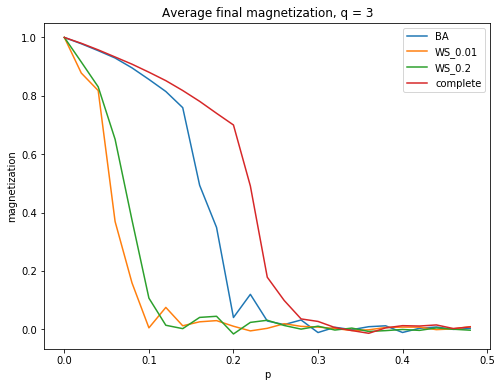

In [24]:
plt.figure(figsize= (8,6))
plt.title('Average final magnetization, q = 3')
plt.plot(x, y0, label = 'BA')
plt.plot(x, y1, label = 'WS_0.01')
plt.plot(x, y2, label = "WS_0.2")
plt.plot(x, y3, label = 'complete')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()
plt.plot()

[]

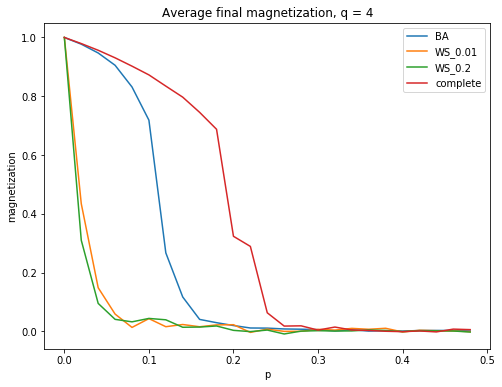

In [18]:
plt.figure(figsize= (8,6))
plt.title('Average final magnetization, q = 4')
plt.plot(x, y0, label = 'BA')
plt.plot(x, y1, label = 'WS_0.01')
plt.plot(x, y2, label = "WS_0.2")
plt.plot(x, y3, label = 'complete')
plt.xlabel('p')
plt.ylabel('magnetization')
plt.legend()
plt.plot()